In [1]:
print('start')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
print('end')

start
end


In [2]:
import docker

print('start')
# Initialize the Docker client
client = docker.from_env()

# Get the container by name
container = client.containers.get('namenode')

# Execute the cat command inside the container to read the file
file_content = container.exec_run('cat /data/data.csv').output.decode('utf-8')

# You can now load this content into a pandas DataFrame (optional)
import pandas as pd
from io import StringIO

# Load the content into a pandas DataFrame
df = pd.read_csv(StringIO(file_content))

# Show the DataFrame
print(df.head())


start
   OrderID  CustomerID  ProductID  Quantity            OrderDate  \
0        1       92256         15         1  2023-06-16 12:00:00   
1        2        7170          2         7  2020-11-09 12:00:00   
2        3       57706         20         6  2021-11-14 12:00:00   
3        4       78850         16         4  2020-08-13 12:00:00   
4        5       37213          7         2  2021-11-28 12:00:00   

                                     ShippingAddress         ShippingDate  \
0  485 Jackson Falls Apt. 624 Lake Michelleland, ...  2021-05-23 12:00:00   
1     074 Brown Estate Suite 175 Robinbury, MO 37341  2022-10-01 12:00:00   
2          0362 Adam Vista Patriciaborough, UT 39097  2023-09-27 12:00:00   
3             329 Isabel Ranch Grimesshire, HI 37219  2022-03-05 12:00:00   
4  711 Skinner Street Suite 169 East Annette, SC ...  2020-06-23 12:00:00   

                Name  Age  Country     RegistrationDate ProductName  \
0          Kyle Hunt   20   Canada  2022-07-01 12:0

start


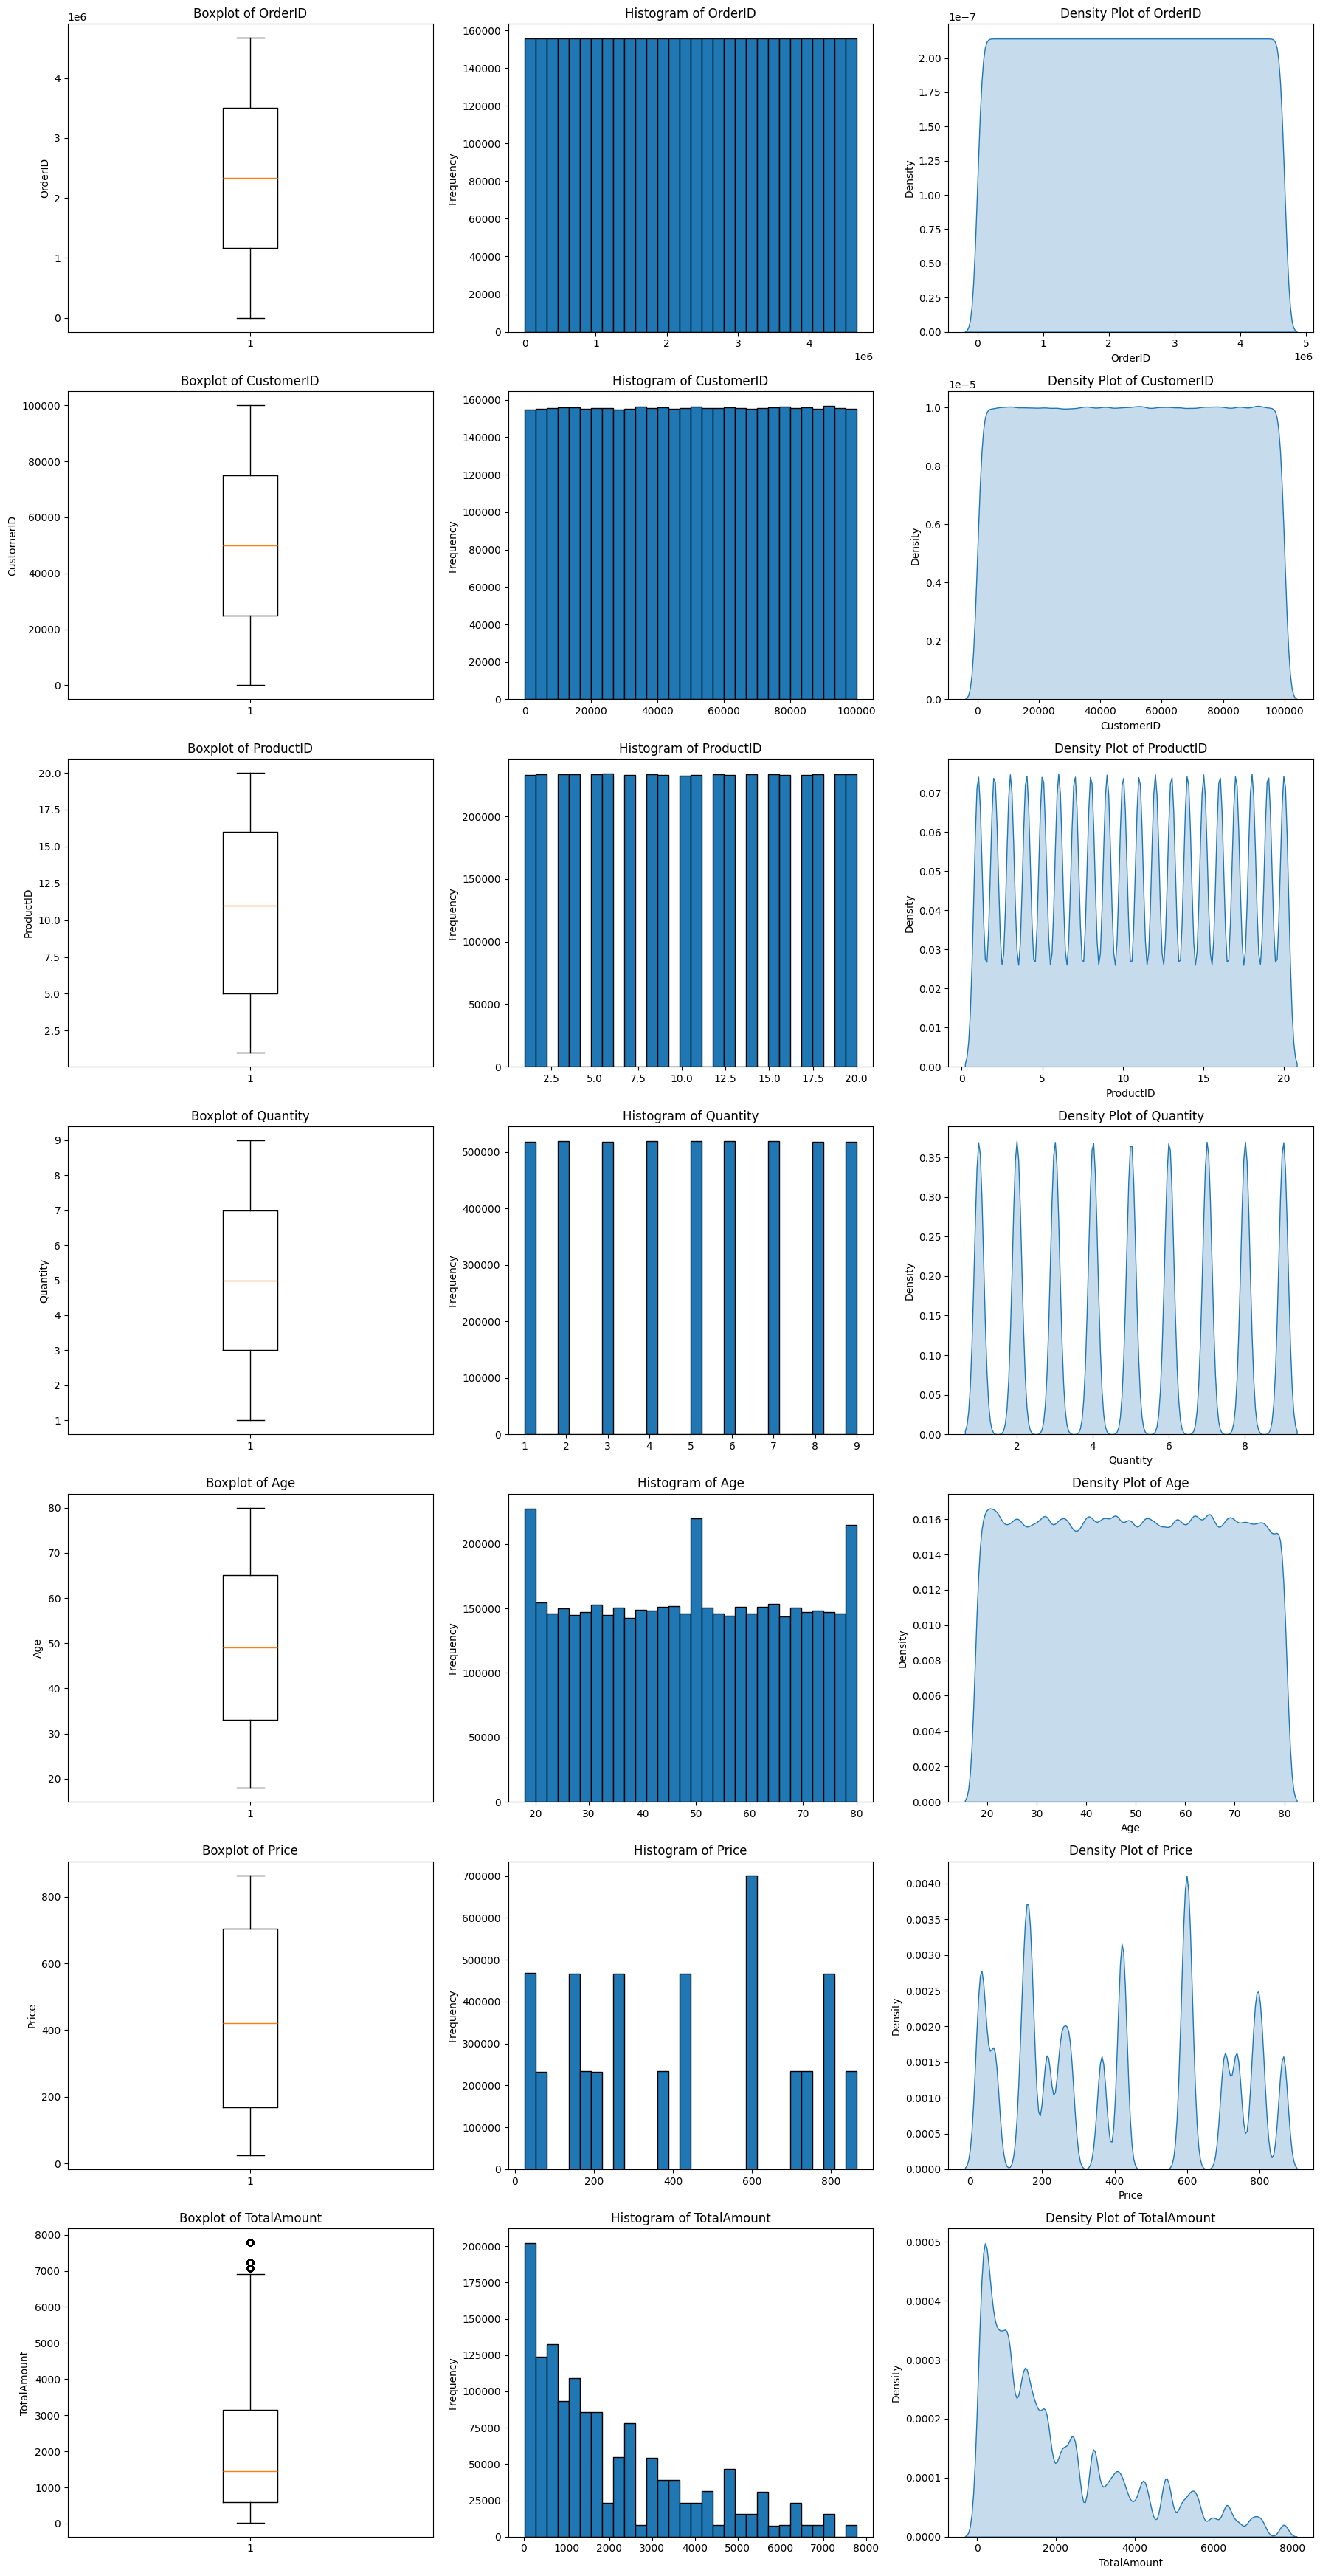

In [4]:
print('start')
data = df
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure and axes
fig, axs = plt.subplots(nrows=len(numerical_cols), ncols=3, figsize=(18, len(numerical_cols) * 5))

for i, col in enumerate(numerical_cols):
    
    # Boxplot
    axs[i, 0].boxplot(data[col].dropna())
    axs[i, 0].set_title(f'Boxplot of {col}')
    axs[i, 0].set_ylabel(col)
    
    # Histogram
    axs[i, 1].hist(data[col].dropna(), bins=30, edgecolor='black')
    axs[i, 1].set_title(f'Histogram of {col}')
    axs[i, 1].set_ylabel('Frequency')

    # Density plot
    sns.kdeplot(data[col].dropna(), ax=axs[i, 2], fill=True)
    axs[i, 2].set_title(f'Density Plot of {col}')
    axs[i, 2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
print('start')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Set up the figure for bar plots
fig, axs = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, len(categorical_cols) * 6))

for i, col in enumerate(categorical_cols):
    # Generate frequency table
    frequency_table = data[col].value_counts()
    
    # Print frequency table to the console
    print(f'Frequency Table for {col}:\n{frequency_table}\n')
    
    # Bar plot
    axs[i].bar(frequency_table.index, frequency_table.values, color='skyblue')
    axs[i].set_title(f'Bar Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    # Adding frequency table text on the plot
    for j, value in enumerate(frequency_table.values):
        axs[i].text(j, value + 1, str(value), ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

start
Frequency Table for OrderDate:
OrderDate
2020-12-28 12:00:00    3406
2022-10-29 12:00:00    3391
2021-03-18 12:00:00    3369
2022-08-01 12:00:00    3364
2023-05-30 12:00:00    3355
                       ... 
2023-08-16 12:00:00    3036
2022-04-13 12:00:00    3030
2021-06-15 12:00:00    3024
2023-11-01 12:00:00    3012
2021-11-28 12:00:00    3010
Name: count, Length: 1461, dtype: int64

Frequency Table for ShippingAddress:
ShippingAddress
USNS King FPO AE 57227                              2
USNV Smith FPO AA 93867                             2
USCGC Wagner FPO AA 61054                           2
USNV Johnson FPO AP 44491                           2
USS Torres FPO AE 29227                             2
                                                   ..
PSC 4349, Box 2735 APO AE 79661                     1
6303 Lori Groves Apt. 032 North Johnny, TN 20720    1
902 Robert Greens Suite 243 Joshuastad, PW 72684    1
08300 Benjamin Shoals East Annettefurt, HI 73623    1
864 Garcia 

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000002C3BBC37060> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002C400958B80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [7]:
print('start')
def numerical_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
        if not outliers.empty:
            print(f"{column} Outliers:")
            for outlier in outliers:
                print(f"- {outlier}")
            print()

numerical_outliers(data)

start
TotalAmount Outliers:
- 7779.51
- 7227.18
- 7227.18
- 7227.18
- 7072.2
- 7072.2
- 7227.18
- 7072.2
- 7779.51
- 7227.18
- 7779.51
- 7779.51
- 7227.18
- 7779.51
- 7779.51
- 7779.51
- 7072.2
- 7072.2
- 7072.2
- 7072.2
- 7779.51
- 7779.51
- 7779.51
- 7227.18
- 7779.51
- 7227.18
- 7227.18
- 7227.18
- 7227.18
- 7072.2
- 7779.51
- 7072.2
- 7227.18
- 7779.51
- 7779.51
- 7227.18
- 7227.18
- 7227.18
- 7779.51
- 7779.51
- 7779.51
- 7779.51
- 7779.51
- 7779.51
- 7072.2
- 7227.18
- 7779.51
- 7072.2
- 7227.18
- 7227.18
- 7779.51
- 7779.51
- 7227.18
- 7779.51
- 7779.51
- 7779.51
- 7227.18
- 7072.2
- 7779.51
- 7779.51
- 7072.2
- 7227.18
- 7072.2
- 7227.18
- 7779.51
- 7227.18
- 7779.51
- 7072.2
- 7227.18
- 7227.18
- 7072.2
- 7227.18
- 7227.18
- 7779.51
- 7779.51
- 7227.18
- 7072.2
- 7227.18
- 7779.51
- 7072.2
- 7779.51
- 7779.51
- 7072.2
- 7779.51
- 7072.2
- 7779.51
- 7227.18
- 7779.51
- 7779.51
- 7227.18
- 7779.51
- 7227.18
- 7227.18
- 7227.18
- 7072.2
- 7779.51
- 7227.18
- 7779.51
- 7072.2
- 70

In [8]:
print('start')
def check_missing_data(df):
    missing_summary = df.isnull().sum()
    missing_percentage = (missing_summary / len(df)) * 100

    print("Missing Values Summary:")
    print(pd.DataFrame({
        'Missing Count': missing_summary,
        'Percentage': missing_percentage
    }))
    
    return missing_summary, missing_percentage

missing_summary, missing_percentage = check_missing_data(data)
print(missing_summary)

start
Missing Values Summary:
                  Missing Count  Percentage
OrderID                       0    0.000000
CustomerID                    0    0.000000
ProductID                     0    0.000000
Quantity                      0    0.000000
OrderDate                     0    0.000000
ShippingAddress               0    0.000000
ShippingDate                  0    0.000000
Name                          0    0.000000
Age                           0    0.000000
Country                       0    0.000000
RegistrationDate              0    0.000000
ProductName                   0    0.000000
Category                      0    0.000000
Price                         0    0.000000
TotalAmount             3268360   70.004269
OrderID                   0
CustomerID                0
ProductID                 0
Quantity                  0
OrderDate                 0
ShippingAddress           0
ShippingDate              0
Name                      0
Age                       0
Country       

start


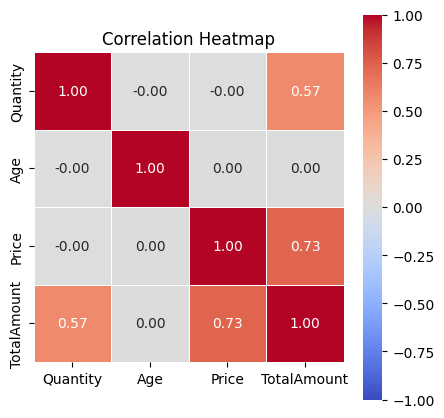

Correlation Table:
             Quantity       Age     Price  TotalAmount
Quantity     1.000000 -0.000406 -0.000526     0.570906
Age         -0.000406  1.000000  0.000460     0.001323
Price       -0.000526  0.000460  1.000000     0.729128
TotalAmount  0.570906  0.001323  0.729128     1.000000


In [10]:
print('start')
selected_cols = [
    'Quantity', 
    'Age', 
    'Price', 
    'TotalAmount', 
]

correlation_matrix = data[selected_cols].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Display the correlation table
print("Correlation Table:")
print(correlation_matrix)